<a target="_blank" href="https://colab.research.google.com/github/echoi/compgeodyn/blob/master/Solving_1D_Poisson_Equation_with_FEM.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Solving Poisson equation in 1D with FEM


Given $f: \Omega \rightarrow \mathbb{R}$, $g: \Gamma_{g} \rightarrow \mathbb{R}$, and $h: \Gamma_{h} \rightarrow \mathbb{R}$, where $\Gamma_g \cap \Gamma_h = \varnothing$ and $\Gamma_g \cup \Gamma_h = \partial \Omega$, 

find $u: \bar{\Omega} \rightarrow \mathbb{R}$ such that

\begin{equation*}
\text{(D)} \qquad \left.\begin{aligned}
&-\Delta u(\mathbf{x}) = f(\mathbf{x}) \quad \text{ in } \Omega,\\
& u=g(\mathbf{x})\ \text{ on } \Gamma_{g}, \\
& u_n = \nabla u \cdot \mathbf{n} = h(\mathbf{x})\ \text{ on } \Gamma_{h}
\end{aligned}
\right.
\end{equation*}


Let $S$ be the trial solution space, $V$ the test function space:
\begin{equation*}
\begin{split}
S &= \left\{ s | s = g\ \text{on}\ \Gamma_{g}\ \text{and}\ s \in H^{1}(\Omega) \right\} \\
V &= \left\{ v | v \in H^{1}_{0}(\Omega) \right\}.
\end{split}
\end{equation*}

\begin{equation*}
\text{(W)} \qquad \text{Find } u \in S \text{ such that } a(u,v)=(f,v) + <h,v> \forall v \in V,
\end{equation*}
where 

\begin{equation}
  <h,v>=\int_{\partial \Gamma_{h}} h\,v\, dS.
\end{equation}

- Let $S^{h}$ and $V^{h}$ be finite-dimensional approximation to $S$ and $V$. 
- Assume for $\forall v^{h} \in V^{h}$, $v^{h}|_{\Gamma_{g}}=0$. 
- Then, $u^{h} \in S^{h} = v^{h} + g^{h}$ where $v^{h} \in V^{h}$ and $g^{h} = g$ on $\Gamma_{g}$ and 0 otherwise.

Given $f$, $g$, and $h$ as in ($D$), 
\begin{equation*}
\begin{split}
& (\text{W}_{h}) \qquad \text{Find } u^{h} \in S^{h} \text{ such that } \\
& a(w^{h},v^{h})=(f,w^{h}) + <h,w^{h}> - (\nabla g^{h}, \nabla w^{h}) \text{ for } \forall w^{h} \in V^{h}.
\end{split}
\end{equation*}

## Meaning of *finite-dimensional approximation*

- Consider the Fourier expansion of $\exp(x)$ in $[-\pi,\pi]$.

$$
e^x = \frac{\sinh(\pi)}{\pi} + \sum_{n=1}^{\infty} \left[ \frac{2 \cos(n \pi) \sinh(\pi)}{\pi (1 + n^2)} \cos(nx) - \frac{2n \cos(n \pi) \sinh(\pi)}{\pi (1 + n^2)} \sin(nx) \right].
$$

- The key point here is that the equality requires the infinite sum.
    - If the sum on the right-hand side is truncated at a **finite number**, the expansion can only **approximate** the exponential function

- Also recall the homework questions
    - The Taylor seris expansion of $\sin(\pi x)$ about $x=0$
    - The generalized Fourier series of $\sin(\pi x)$ with Legendre polynomials
    
- With only **finite** terms in these polynomial expansions, they can only **approximate** $\sin(\pi x)$.


### Example 1

- Let's write down a cubic polynomial as $a_{0} + a_{1}x + a_{2}x^{2} + a_{3}x^{3}$.
- The set of all the cubic polynomials, $P_{3}$, forms a (normed vector) function space (a.k.a. Hilbert space). 
    - with the L2 inner product, (f,g). 
    - Look up the web for all the properties required for this type of space!
- $P_{3}$ is *infinite* in the sense that it has infinite elements: i.e., infinite choices for the coefficients, $a_{0}$, $a_{1}$, $a_{2}$, and $a_{3}$.
- However, $P_{3}$ is **finite (four) dimensional** because any element function in $P_{3}$ can be exactly represented by **four basis functions**: $1$, $x$, $x^2$ and $x^3$; or $L_{0}$, $L_{1}$, $L_{2}$, and $L_{3}$ (Legendre functions); etc.

### Example 2
- $\sin(\pi x)$ in $[-1,1]$ can be exactly represented only with infinitely many basis functions. 
- In that sense, a function space that includes $\sin(\pi x)$ must have **infinite dimension**.
    - However, $P_{3}[-1,1]$ can be a reasonable **finite dimensional approximation** to that function space.

- The solution and test function spaces for the weak form,

\begin{equation*}
\begin{split}
S &= \left\{ s | s = g\ \text{on}\ \Gamma_{g}\ \text{and}\ s \in H^{1}(\Omega) \right\}, \\
V &= \left\{ v | v \in H^{1}_{0}(\Omega) \right\},
\end{split}
\end{equation*}

are **infinite dimensional** in the sense that element functions generally require infinitely many basis functions.

- Now we understand what it means that **finite element method attemps to find approximate solution in finite dimensional subspaces, $S^{h}$ and $V^{h}$.**


## One idea for finding finite dimensional spaces

- This particular idea is a combination of the fundamental contributions form Ritz, Galerkin and Courant (for more details, see Gander and Wenner, SIAM Review, 2012).
- Let's start with a suitable spatial discretization of the original problem domain. (cf. the chapter on piecewise polynomial interpolation): e.g.,

    Original Domain | Triangulation 1 | Triangulation 2
    - | - | -
    <img src="Figures/Poisson_2D_Domain_original.png" width=200> | <img src="Figures/Poisson_2D_Domain_tris.png" width=200> | <img src="Figures/Poisson_2D_Domain_quads.png" width=200>
    (reproduce these with [this Cubit file](Figures/Poisson_2D_Domain_Discretization.cub5)
- We will call a trianguation *a mesh* from now on and proceed with triangle elements, addressing quadrilaterals later.

- We choose $V^{h}$ as follows:

$$ V^{h} = \left\{v | v\text{ is continuous, } v|_{K_j}\text{ is linear in }^\forall K_{j} \in \mathcal{T}_{h},\ v|_{\partial \Omega} = 0. \right\} $$

- Also we require the basis functions $\phi_{j}(\mathbf{x})$ for $V^{h}$ to have this property: $\phi_{j}(\mathbf{x}_{i})=\delta_{ij}$, where $j=1,\ldots,M$ and $\mathbf{x}_{i}$ is the coordinates of $i$-th node of the mesh.
- These two choices give us **continuous, piecewise linear** functions with **a compact ($\equiv$closed and bounded) support**.


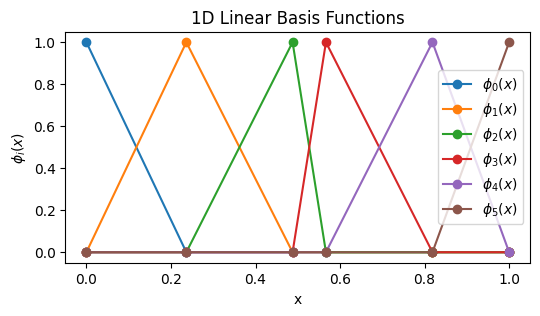

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_1d_linear_basis_functions(num_elements):
  """
  Plots 1D linear basis functions for a given number of elements.

  Args:
    num_elements: The number of elements in the mesh.
  """

  # Generate node coordinates
  num_nodes = num_elements + 1
  nodes = np.linspace(0, 1, num_nodes)
  rnd_dx = np.random.uniform(-0.1, 0.1, size=num_nodes)
  rnd_dx[0] = 0.0
  rnd_dx[-1] = 0.0
  nodes += rnd_dx

  # Create figure and axes
  fig, ax = plt.subplots(1,1, figsize=(6,3))

  # Plot basis functions
  for i in range(num_nodes):
    x = nodes
    y = np.zeros_like(x)
    y[i] = 1.0
    ax.plot(x, y, '-o', label=f'$\phi_{i}(x)$')

  # Set plot labels and title
  ax.set_xlabel('x')
  ax.set_ylabel('$\phi_i(x)$')
  ax.set_title('1D Linear Basis Functions')

  # Add legend
  ax.legend()

  # Show plot
  plt.show()

# Example usage:
plot_1d_linear_basis_functions(5)  # Plot basis functions for 4 elements

Going back to the Poisson equation in 1D and applying the above idea for a 5-element triangulation, let's derive the approximate weak form in one dimension.
- Without loss of generality, we assume the domain to be $[0,1]$.
- For simplicity, let's start with the boundary conditions, $u(0)=u(1)=0$.
Given $f$, $g$, and $h$ as in ($D$), 
\begin{equation*}
\begin{split}
& (\text{W}_{h}) \qquad \text{Find } u^{h} = \sum_{i=1}^{4} u_{i}\phi_{i}(x) \text{ such that } \\
& \int_{0}^{1} \frac{du^{h}}{dx}\frac{dv^{h}}{dx} dx = \int_{0}^{1}f\,w^{h}dx, \quad \forall v^{h}, w^{h} \in V^{h}.
\end{split}
\end{equation*}
- Note that this trial solution automatically satisfies the given Dirichlet boundary condition.

By chooing one of the $\phi_{j}$'s as $v_{h}$ and plugging in the test solution into the approximate/discrete weak form, we get

\begin{equation*}
\int_{0}^{1} \sum_{i=1}^{4} u_{i}\frac{d\phi_{i}(x)}{dx}\frac{d\phi_{j}(x)}{dx} dx = \int_{0}^{1}f\,\phi_{j}dx.
\end{equation*}

- When $j=1$,
\begin{equation*}
u_{1}\int_{0}^{1} \frac{d\phi_{1}(x)}{dx}\frac{d\phi_{1}(x)}{dx} dx + 
u_{2}\int_{0}^{1} \frac{d\phi_{2}(x)}{dx}\frac{d\phi_{1}(x)}{dx} dx +
u_{3}\int_{0}^{1} \frac{d\phi_{3}(x)}{dx}\frac{d\phi_{1}(x)}{dx} dx +
u_{4}\int_{0}^{1} \frac{d\phi_{4}(x)}{dx}\frac{d\phi_{1}(x)}{dx} dx = \int_{0}^{1}f\,\phi_{1}dx.
\end{equation*}
or
\begin{equation*}
u_{1} a(\phi_{1},\phi_{1}) + 
u_{2} a(\phi_{2},\phi_{1}) + 
u_{3} a(\phi_{3},\phi_{1}) + 
u_{4} a(\phi_{4},\phi_{1})
= (f,\phi_{1}).
\end{equation*}

- For $j=$2, 3, and 4,

\begin{equation*}
\begin{split}
u_{1} a(\phi_{1},\phi_{2}) + 
u_{2} a(\phi_{2},\phi_{2}) + 
u_{3} a(\phi_{3},\phi_{2}) + 
u_{4} a(\phi_{4},\phi_{2})
&= (f,\phi_{2})\\
u_{1} a(\phi_{1},\phi_{3}) + 
u_{2} a(\phi_{2},\phi_{3}) + 
u_{3} a(\phi_{3},\phi_{3}) + 
u_{4} a(\phi_{4},\phi_{3})
&= (f,\phi_{3})\\
u_{1} a(\phi_{1},\phi_{4}) + 
u_{2} a(\phi_{2},\phi_{4}) + 
u_{3} a(\phi_{3},\phi_{4}) + 
u_{4} a(\phi_{4},\phi_{4})
&= (f,\phi_{4})
\end{split}
\end{equation*}


Finally, we can identify a linear system, which can be denoted as
\begin{equation}
\mathbf{K}\mathbf{u}=\mathbf{f},
\end{equation}
where $K_{ij} = a(\phi_{i},\phi_{j})$ and $f_{i} = (f,\phi_{i})$.

- Note that we used the fact that $a(\phi_{i},\phi_{j})=a(\phi_{j},\phi_{i})$.

- You can employ your favorite linear system solver to get the solution vector, $\mathbf{u}$.

## Complete workout

<img src="Figures/Poisson_1D_examle_domain.png" width=600>

- The 1-D domain has been generalized to $[x0, x5]$ but is still discretized to 5 elements. 
- For simplicity, the Dirichlet boundary conditions are applied: $u(x_{0})=u(x_{5})=0$.

<img src="Figures/Poisson_1D_examle_domain.png" width=400>


After working out the piecewise expressions for $\phi_{i}$'s and $\phi_{i}^{\prime}$'s, we get the following linear system:
$$
\begin{pmatrix}
\frac{1}{x_{1}-x_{0}}+\frac{1}{x_{2}-x_{1}} & -\frac{1}{x_{2}-x_{1}} & 0  & 0 \\
-\frac{1}{x_{2}-x_{1}} & \frac{1}{x_{2}-x_{1}}+\frac{1}{x_{3}-x_{2}} & -\frac{1}{x_{3}-x_{2}} & 0 \\
0 & -\frac{1}{x_{3}-x_{2}} & \frac{1}{x_{3}-x_{2}}+\frac{1}{x_{4}-x_{3}} & -\frac{1}{x_{4}-x_{3}} \\
0 & 0 & -\frac{1}{x_{4}-x_{3}} & \frac{1}{x_{4}-x_{3}}+\frac{1}{x_{5}-x_{4}}\\
\end{pmatrix}
\begin{pmatrix}
u_{1} \\
u_{2} \\
u_{3} \\
u_{4}
\end{pmatrix}
=
\begin{pmatrix}
(f,\phi_{1})_{K_{0} \cup K_{1}} \\
(f,\phi_{2})_{K_{1} \cup K_{2}} \\
(f,\phi_{3})_{K_{2} \cup K_{3}} \\
(f,\phi_{4})_{K_{3} \cup K_{4}}
\end{pmatrix}
$$

<img src="Figures/Poisson_1D_examle_domain_source.png" width=400>

When the source function, $f(x)$, is given as $f(x)=f_{0}\delta(x-x_{1})$ and the element sizes are all equal ($h$), the above linear system becomes:

$$
\frac{1}{h}
\left(
\begin{array}{rrrr}
2 & -1 & 0  & 0 \\
-1 & 2 & -1 & 0 \\
0 & -1 & 2 & -1 \\
0 & 0 & -1 & 2 \\
\end{array}
\right)
\begin{pmatrix}
u_{1} \\
u_{2} \\
u_{3} \\
u_{4}
\end{pmatrix}
=
\begin{pmatrix}
2f_{0} \\
0 \\
0 \\
0
\end{pmatrix}
$$

<img src="Figures/Poisson_1D_examle_domain_source.png" width=400>

We can easily compute the solutions for the above linear system. Now, let's try to derive the analytic solution to the original boundary value problem for the given source function. We will assume $h=1$ and thus the domain is $[0,5]$. Then, the point source of the unit magnitude (i.e., $f_0=1$) is located at $x=1$.

$$
\begin{eqnarray}
-u_{xx} &= \delta(x-1) \\
u(0) &= u(5) = 0.
\end{eqnarray}
$$

<img src="Figures/Poisson_1D_examle_domain_solution.png" width=400>

Let's try to derive the analytic solution to the original boundary value problem for the source function given above. We will assume $h=1$ and thus the domain is $[0,5]$. Then, the point source of the unit magnitude is located at $x=1$.

$$
\begin{eqnarray}
-u_{xx} &= \delta(x-1) \\
u(0) &= u(5) = 0.
\end{eqnarray}
$$


By integrating once, the delta function on the r.h.s. becomes a Heaviside function:

$$
\begin{array}{lll}
u_{x} &= C_{1}     &\text{ for } 0 \le x < 1 \\
u_{x} &= 1 + C_{1} &\text{ for } x \ge 1.
\end{array}
$$

Integrating once more,
$$
\begin{array}{lll}
u_{x} &= C_{1}x + C_{2}         &\text{ for } 0 \le x < 1 \\
u_{x} &= (1 + C_{1})x + (C_2-1) &\text{ for } x \ge 1,
\end{array}
$$
where the continuity at $x=1$ has been applied.

By applying the boundary conditions, $u(0)=u(5)=0$, we get
$$
\begin{array}{lll}
u(x) &= \frac{4}{5}x      &\text{ for } 0 \le x \le 1 \\
u(x) &= -\frac{1}{5}x + 1 &\text{ for } x > 1.
\end{array}
$$


